<div style="display: flex;">
    <div style="flex: 1;">
        <h1>Análisis Exploratorio de Datos</h1>
        <h2>4A. Exploración de Datos mediante proyecciones</h2>
        <p><strong>Nombre:</strong> David Aaron Ramirez Olmeda<br>
        <strong>Programa:</strong> Maestría en Ciencia de Datos e Información</p>
    </div>
    <img src="https://pbs.twimg.com/profile_images/1674912653049774081/Lj1u22X8_400x400.jpg" alt="Imagen de Portada" width="170" height="170">
</div>

### Parte primera - Investigación

Comencemos con la investigación sobre t-SNE (t-Distributed Stochastic Neighbor Embedding) y SVD (Singular Value Decomposition) para comprender su funcionamiento y sus implementaciones existentes:

**t-SNE (t-Distributed Stochastic Neighbor Embedding):**

t-SNE es una técnica de reducción de dimensionalidad no lineal que se utiliza para visualizar datos de alta dimensión en un espacio de menor dimensión. Su objetivo principal es preservar las relaciones de similitud entre puntos en el datos originales al proyectarlos en un espacio de baja dimensión (comúnmente 2D o 3D).

Funcionamiento clave:
- t-SNE comienza por calcular probabilidades condicionales que representan similitudes entre puntos en el espacio de alta dimensión.
- Luego, construye un espacio de baja dimensión y calcula probabilidades similares para los mismos puntos en ese espacio.
- A continuación, ajusta el espacio de baja dimensión para minimizar la divergencia entre las probabilidades condicionales en ambos espacios.
- Este proceso ayuda a agrupar puntos similares en el espacio de baja dimensión, lo que facilita su visualización.

Implementaciones existentes:
- En Python, puedes utilizar la biblioteca Scikit-learn para aplicar t-SNE en tus datos. La función `TSNE` de Scikit-learn es una implementación ampliamente utilizada.

**SVD (Singular Value Decomposition):**

SVD es una técnica matemática que factoriza una matriz en tres matrices distintas: U, Σ (sigma), y V^T, donde U y V son matrices unitarias, y Σ es una matriz diagonal que contiene los valores singulares. SVD se utiliza comúnmente en álgebra lineal y análisis de datos.

Funcionamiento clave:
- SVD descompone una matriz de datos en componentes principales que capturan la variabilidad en los datos.
- Los valores singulares en Σ indican la importancia de cada componente principal.
- Puedes seleccionar un número reducido de componentes principales para reducir la dimensionalidad de los datos mientras mantienes la mayor cantidad posible de información.

Implementaciones existentes:
- En Python, NumPy ofrece una implementación de SVD. También puedes utilizar la biblioteca Scikit-learn, que proporciona herramientas para aplicar SVD y PCA (que utiliza SVD internamente) en tus datos.

A continuación, te proporciono los ejemplos y recursos relacionados con t-SNE y SVD:

**Ejemplo de t-SNE en Python:**

Puedes encontrar un ejemplo práctico de t-SNE en Python en el siguiente recurso:

[Guía de t-SNE en Python](https://builtin.com/data-science/tsne-python)

Esta guía proporciona un tutorial paso a paso sobre cómo aplicar t-SNE utilizando Python y la biblioteca Scikit-learn. Incluye ejemplos de código y visualizaciones para ayudarte a comprender cómo utilizar t-SNE análisis de datos.

**Guía para principiantes de Truncated SVD:**

Para obtener información sobre SVD y su uso en la reducción de dimensionalidad, puedes consultar la siguiente guía:

[Guía para principiantes de Truncated SVD para reducción de dimensionalidad](https://analyticsindiamag.com/beginners-guide-to-truncated-svd-for-dimensionality-reduction/)

En esta guía, encontrarás una explicación clara de cómo funciona el SVD truncado (Truncated SVD) y cómo se aplica para reducir la dimensionalidad de tus datos. También se discuten los conceptos clave, como el número de componentes principales a seleccionar y cómo interpretar los resultados.

### Parte segunda - Análisis de datos sobre datos2.csv

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [2]:
cwd = os.getcwd()
data=pd.read_csv(os.path.join(cwd, 'data/datos2.csv')).values[1:,1:]
data.shape

(94, 110)

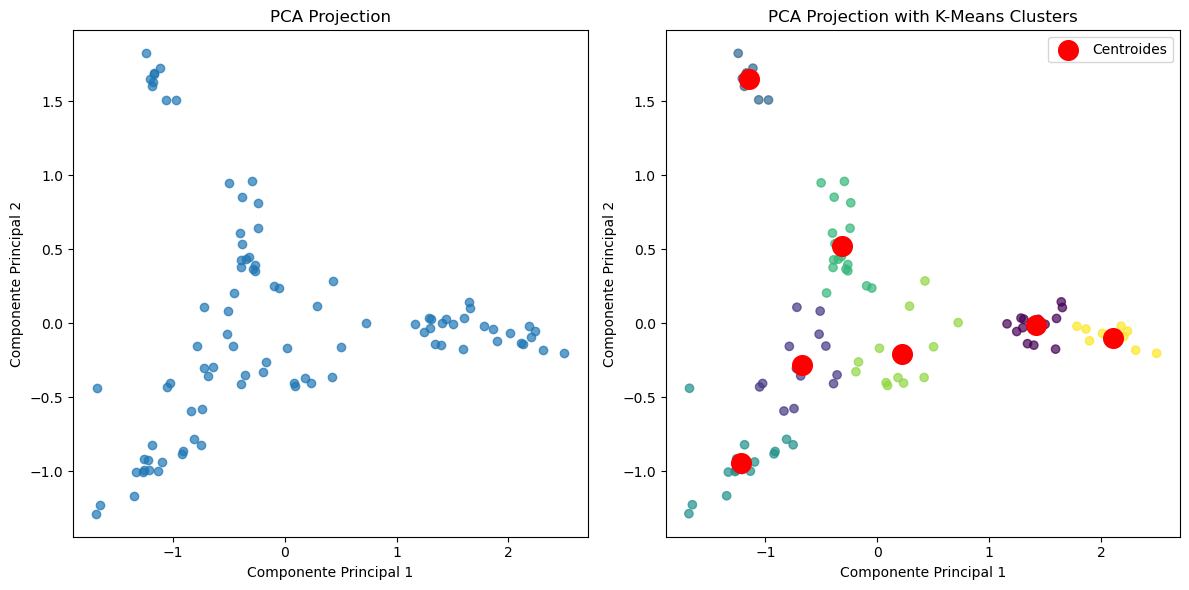

In [3]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Definir el número de clusters que deseas encontrar
num_clusters = 7  # Puedes ajustar este número según tu criterio

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(data_pca)

# Crear dos subplots uno al lado del otro
plt.figure(figsize=(12, 6))

# Primer subplot: Proyección PCA original
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], marker='o', alpha=0.7)
plt.title('PCA Projection')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Segundo subplot: Proyección PCA con K-Means Clusters
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('PCA Projection with K-Means Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

# Mostrar los subplots
plt.tight_layout()
plt.show()


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


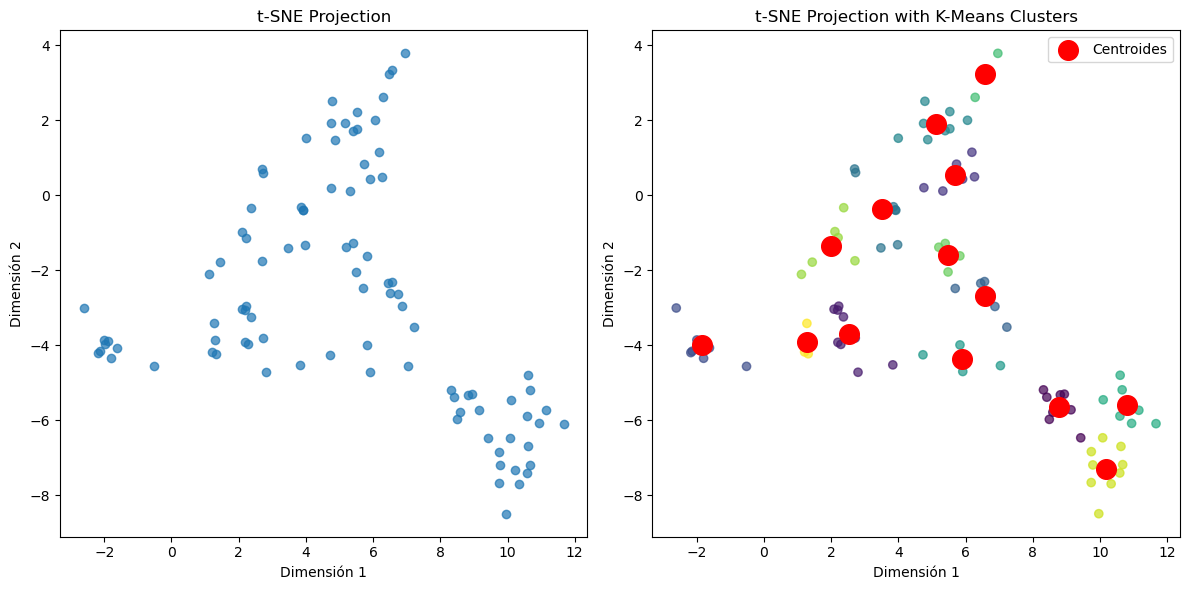

In [4]:
# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)

# Definir el número de clusters que deseas encontrar
num_clusters = 14  # Puedes ajustar este número según tu criterio

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(data_tsne)

# Crear dos subplots uno al lado del otro
plt.figure(figsize=(12, 6))

# Primer subplot: Proyección t-SNE original
plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], marker='o', alpha=0.7)
plt.title('t-SNE Projection')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# Segundo subplot: Proyección t-SNE con K-Means Clusters
plt.subplot(1, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('t-SNE Projection with K-Means Clusters')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()

# Mostrar los subplots
plt.tight_layout()
plt.show()


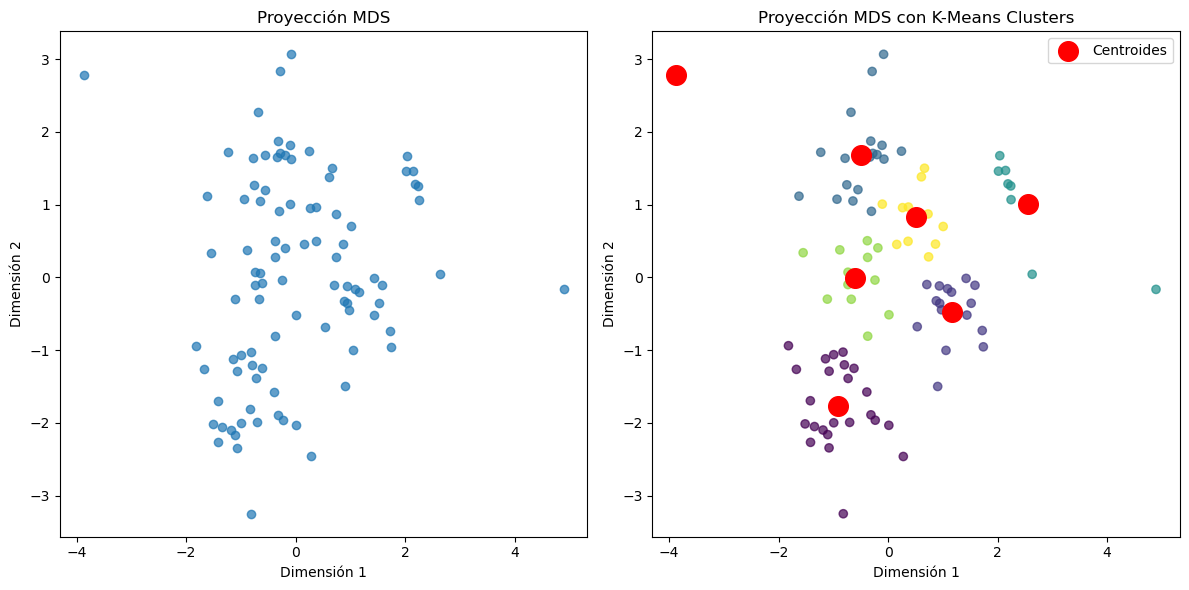

In [12]:
# Aplicar MDS para reducir a 2 dimensiones
mds = MDS(n_components=2)
data_mds = mds.fit_transform(data)


# Supongamos que 'data_mds' contiene tus datos proyectados en 2D

# Definir el número de clusters que deseas encontrar
num_clusters = 7  # Puedes ajustar este número según tu criterio

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(data_mds)

# Crear dos subplots uno al lado del otro
plt.figure(figsize=(12, 6))

# Primer subplot: Datos proyectados en 2D sin K-Means
plt.subplot(1, 2, 1)
plt.scatter(data_mds[:, 0], data_mds[:, 1], marker='o', alpha=0.7)
plt.title('Proyección MDS')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# Segundo subplot: Datos proyectados en 2D con K-Means
plt.subplot(1, 2, 2)
plt.scatter(data_mds[:, 0], data_mds[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('Proyección MDS con K-Means Clusters')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()

# Mostrar los subplots
plt.tight_layout()
plt.show()


Hemos aplicado técnicas de reducción de dimensionalidad, como PCA (Análisis de Componentes Principales), t-SNE (t-Distributed Stochastic Neighbor Embedding), y MDS (Multidimensional Scaling), para visualizar los datos de alta dimensión contenidos en datos2.csv en un espacio de menor dimensión (2D). Además, hemos utilizado el algoritmo K-Means para agrupar los puntos en clusters en el espacio de menor dimensión. Esta representación visual nos permite identificar patrones y estructuras en los datos, lo que sugiere que es posible encontrar una estructura en los datos contenidos en datos2.csv.

Sí, es posible encontrar una estructura en los datos contenidos en datos2.csv mediante la reducción de dimensionalidad y la visualización de los datos en un espacio de menor dimensión, así como la identificación de clusters usando K-Means, tema visto en otros cursos de la MCDI y que nos ayuda en este caso en particular.

### Parte tercera - Selecciona un dataset de al menos dimensión 20 de su interés y propón/realiza un análisis basado en métodos de proyección.

Utilizaremos una parte de los datos proporcionados por INEGI sobre accidentes de tránsito terrestre en zona urbanas. Esta elección se debe a que es la naturaleza y elección de mi proyecto de investigación de otra materia en la MCDI. Aprovecharemos este espacio para empezar a manipular dichos datos.

In [16]:
cwd = os.getcwd()
df=pd.read_csv(os.path.join(cwd, 'data/Copia de atus_anual_2022.csv'))

In [17]:
df.describe()

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,...,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO
count,392710.000000,392710.000000,392710.0,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,...,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,392710.000000,392710.0,392710.0
mean,16.864541,41.801485,2022.0,6.614703,13.561855,25.046179,15.971699,1.176425,0.170362,0.003654,...,0.003048,0.075078,0.002559,0.029500,0.000374,0.005931,0.000166,0.000830,0.0,0.0
std,7.820926,58.080481,0.0,3.417281,6.207174,18.067664,9.004914,0.774408,0.427438,0.061798,...,0.076319,0.465490,0.051964,0.182399,0.019735,0.079455,0.013254,0.031904,0.0,0.0
min,1.000000,1.000000,2022.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,11.000000,13.000000,2022.0,4.000000,9.000000,10.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,19.000000,30.000000,2022.0,7.000000,14.000000,25.000000,16.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,22.000000,46.000000,2022.0,10.000000,19.000000,40.000000,24.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,32.000000,570.000000,2022.0,12.000000,23.000000,59.000000,31.000000,9.000000,4.000000,3.000000,...,12.000000,42.000000,4.000000,5.000000,2.000000,3.000000,2.000000,5.000000,0.0,0.0


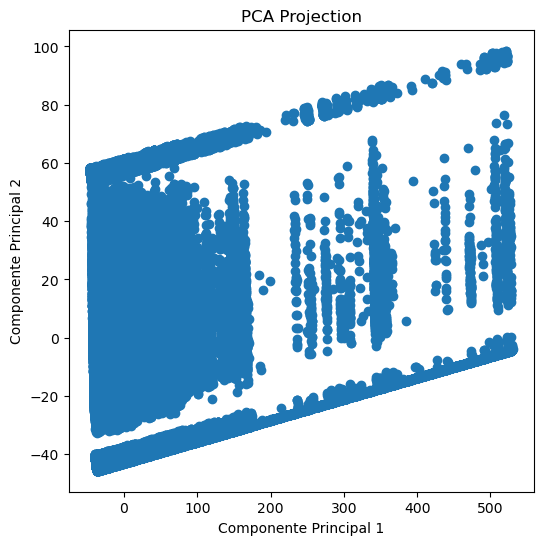

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Obtener el directorio actual
cwd = os.getcwd()

# Cargar los datos desde el archivo CSV
df = pd.read_csv(os.path.join(cwd, 'data/Copia de atus_anual_2022.csv'))

# Separar las columnas categóricas de las numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df.select_dtypes(include=['object']).columns

# Crear un transformador para las columnas categóricas
transformador_categorico = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Combinar transformadores para todas las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', columnas_numericas),
        ('cat', transformador_categorico, columnas_categoricas)
    ])

# Crear un pipeline con preprocesamiento y PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=2))])

# Aplicar el pipeline
data_pca = pipeline.fit_transform(df)

# Visualizar los datos proyectados con PCA
plt.figure(figsize=(6, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title('PCA Projection')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


### Conclusiones

Además de realizar el análisis de reducción de dimensionalidad en datos de accidentes del INEGI, también trabajamos en ejercicios previos relacionados con la proyección de datos utilizando técnicas como PCA y t-SNE. En esos ejercicios, aplicamos estas técnicas a conjuntos de datos ficticios y reales para visualizar cómo se pueden utilizar estas técnicas en diferentes contextos. Así, hemos explorado la utilidad de la reducción de dimensionalidad para comprender y visualizar datos complejos en diversas situaciones.


### Referencias

- https://www.inegi.org.mx/programas/accidentes/#herramientas
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html